In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import os
import glob

In [2]:
def get_location(data, sort, create=False):
    unique_station = data.STATION.unique()
    unique_lat = np.zeros(len(unique_station))
    unique_lon = np.zeros(len(unique_station))
    
    for index, station in enumerate(unique_station):
        unique_lat[index] = data[data.STATION == station].LATITUDE[0]
        unique_lon[index] = data[data.STATION == station].LONGITUDE[0]
        
    
    locations = pd.DataFrame([unique_station, unique_lat, unique_lon]).T

    locations = locations.rename({0:'station ID', 1:'lat', 2:'lon'}, axis='columns')
    
    if create == True:
        locations.to_csv(f'{data_folder}\\P\\locations_{sort}.csv')
        return locations
    return locations

In [58]:
def split_df_station(data, locations, sort, create=False):
    locations = np.array(locations)
    #unique_station = data.STATION.unique()
    #create a data frame dictionary to store your data frames
    DataFrameDict = {x : pd.DataFrame() for x in locations}

    for key in DataFrameDict.keys():
        DataFrameDict[key] = data[:][data.STATION == key]
        if create == True:
            DataFrameDict[key].to_csv(f'{data_folder}\\P\\data per station\\data_{key}_{sort}.csv')
    return DataFrameDict
    

In [29]:
def list_dataframe(dict_data, sort):
    df_list = []
    for name in dict_data.keys():
        DF = pd.read_csv(f'{data_folder}\\P\\data per station\\data_{name}_{sort}.csv', index_col='DATE', parse_dates=True)
        df_list.append(DF)
    return df_list

In [30]:
path = os.getcwd()
home_path = os.path.dirname(path)
data_folder = f'{home_path}\\Data'

In [65]:
files = glob.glob(f"{data_folder}\\*.csv")
files

['C:\\Users\\anne-\\OneDrive - Delft University of Technology\\Documenten\\Environmental Engineering MSc\\ENVM1502-Catchment-model\\Data\\3285895.csv',
 'C:\\Users\\anne-\\OneDrive - Delft University of Technology\\Documenten\\Environmental Engineering MSc\\ENVM1502-Catchment-model\\Data\\3286005.csv',
 'C:\\Users\\anne-\\OneDrive - Delft University of Technology\\Documenten\\Environmental Engineering MSc\\ENVM1502-Catchment-model\\Data\\precipitation_troylockdam.csv',
 'C:\\Users\\anne-\\OneDrive - Delft University of Technology\\Documenten\\Environmental Engineering MSc\\ENVM1502-Catchment-model\\Data\\Q_ids_with_begin-end-date.csv']

In [66]:
data_E = pd.read_csv(files[0],  delimiter=',', index_col='DATE', usecols=['DATE', 'EVAP', 'STATION', 'LATITUDE', 'LONGITUDE'], parse_dates=True)
data_E.STATION.unique()

array(['USW00094728', 'USC00287825', 'USC00432843', 'USC00363761',
       'USC00308096', 'USC00439182', 'USC00286055', 'USC00302169',
       'USC00305382', 'USC00308870', 'USC00300785', 'USC00065445',
       'USC00306674', 'USC00308746', 'USC00061689', 'USC00281335',
       'USC00287831', 'USC00435029', 'USW00014743', 'USC00190120',
       'USC00303464', 'USC00304575', 'USC00366944', 'USC00363018',
       'USC00300063', 'USC00305806'], dtype=object)

In [33]:
dict_stations_evap = split_df_station(data_E, 'evap', create=True)

26

In [10]:
loc_evap = get_location(data_E, 'evap') # , create=True)

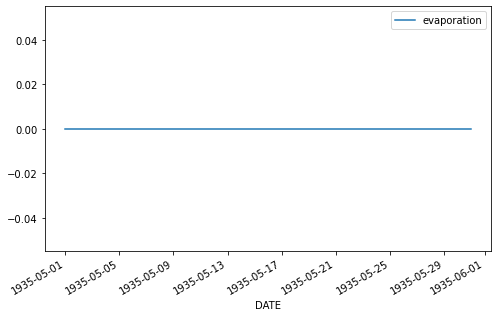

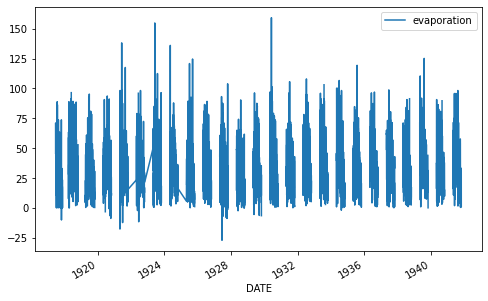

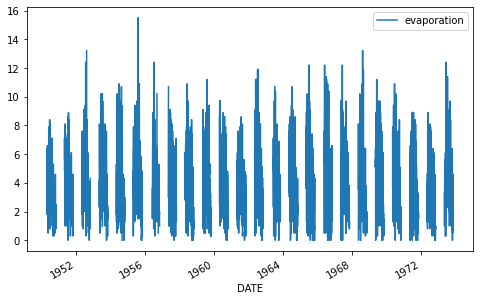

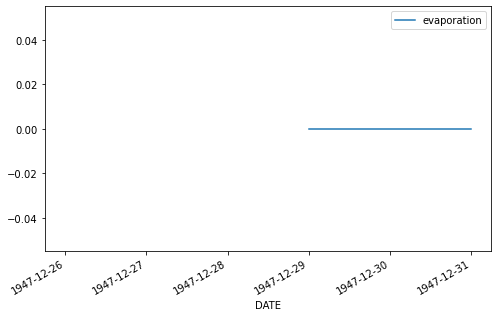

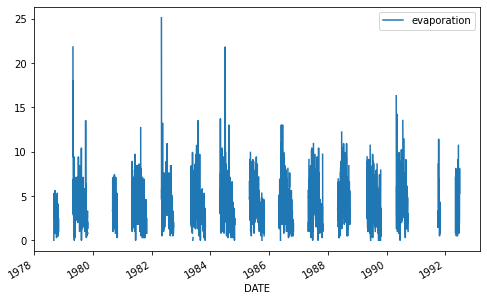

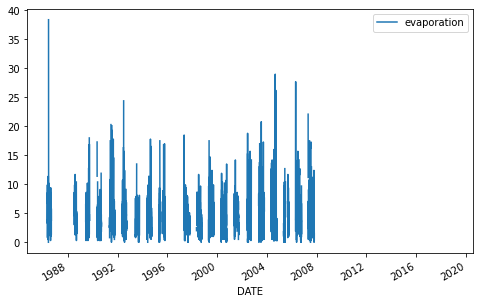

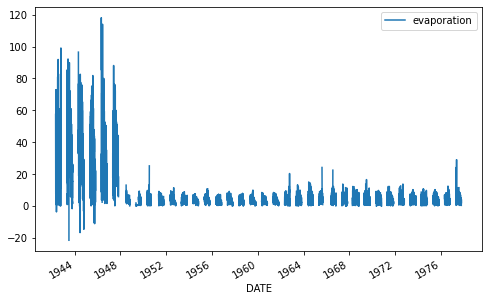

In [12]:
files = glob.glob(f"{data_folder}\\P\\*.csv")
locations_basins = pd.read_csv(files[-1], usecols=['station ID']).values.tolist()

for index, names in enumerate(locations_basins):
    
    fig, ax = plt.subplots(figsize=(8,5))
    dict_stations_evap[names[0]].EVAP.plot(ax=ax, label='evaporation')
    ax.legend()

In [34]:
data_P = pd.read_csv(files[1], index_col='DATE', usecols=['DATE', 'PRCP', 'STATION', 'LATITUDE', 'LONGITUDE'],  delimiter=',', parse_dates=True)
data_P

,STATION,LATITUDE,LONGITUDE,PRCP
DATE,,,,
2021-09-13,US1NHHL0103,42.826,-71.82923,21.3
2021-09-14,US1NHHL0103,42.826,-71.82923,0.0
2021-09-15,US1NHHL0103,42.826,-71.82923,0.0
2021-09-16,US1NHHL0103,42.826,-71.82923,16.3
2021-09-17,US1NHHL0103,42.826,-71.82923,0.3
...,...,...,...,...
1995-01-27,USC00305769,43.200,-74.91667,2.0
1995-01-28,USC00305769,43.200,-74.91667,0.0
1995-01-29,USC00305769,43.200,-74.91667,0.0


In [68]:
files = glob.glob(f"{data_folder}\\P\\*.csv")
files

['C:\\Users\\anne-\\OneDrive - Delft University of Technology\\Documenten\\Environmental Engineering MSc\\ENVM1502-Catchment-model\\Data\\P\\locations_evap.csv',
 'C:\\Users\\anne-\\OneDrive - Delft University of Technology\\Documenten\\Environmental Engineering MSc\\ENVM1502-Catchment-model\\Data\\P\\locations_P.csv',
 'C:\\Users\\anne-\\OneDrive - Delft University of Technology\\Documenten\\Environmental Engineering MSc\\ENVM1502-Catchment-model\\Data\\P\\locations_prcp.csv',
 'C:\\Users\\anne-\\OneDrive - Delft University of Technology\\Documenten\\Environmental Engineering MSc\\ENVM1502-Catchment-model\\Data\\P\\locations_P_in_basin.csv',
 'C:\\Users\\anne-\\OneDrive - Delft University of Technology\\Documenten\\Environmental Engineering MSc\\ENVM1502-Catchment-model\\Data\\P\\location_northern_basin.csv']

In [88]:
locations_basins = pd.read_csv(files[-1], usecols=['station ID']).values.tolist()
locations_basins = np.stack( locations_basins, axis=1 )[0]

dict_stations_P = split_df_station(data_P, locations_basins, 'prcp', create=True)#, create=True)

In [89]:
df_list_evap = list_dataframe(dict_stations_evap, 'evap')
df_list_prcp = list_dataframe(dict_stations_P, 'prcp')

In [86]:
#loc_prcp = get_location(data_P, 'prcp')#, create=True)

In [79]:
for df in df_list_evap:
    df.dropna(inplace=True)


<AxesSubplot:xlabel='DATE'>

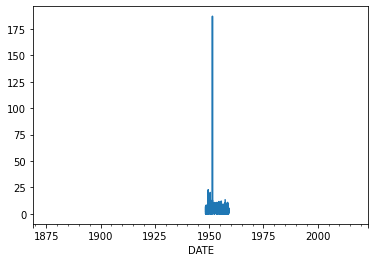

In [14]:
df_list_evap[0].EVAP.plot()

In [102]:
def average_data(df_lst, column):
    
    df_lst_data = []
    
    for i in range(len(df_lst)):
        df_data = df_lst[i][column]
        df_data.to_frame()
        
        df_lst_data.append(df_data)
    
    df = pd.concat(df_lst_data, axis=1)
    df_avg = df.mean(axis=1)
    return df_avg


    
    

In [101]:
average_evap = average_data(df_list_evap, 'EVAP')
average_evap

DATE
1869-01-01   NaN
1869-01-02   NaN
1869-01-03   NaN
1869-01-04   NaN
1869-01-05   NaN
              ..
2023-03-21   NaN
2023-03-22   NaN
2023-03-23   NaN
2023-03-24   NaN
2023-03-25   NaN
Name: EVAP, Length: 56331, dtype: float64
DATE
1907-04-01   NaN
1907-04-02   NaN
1907-04-03   NaN
1907-04-04   NaN
1907-04-05   NaN
              ..
1958-05-27   NaN
1958-05-28   NaN
1958-05-29   NaN
1958-05-30   NaN
1958-05-31   NaN
Name: EVAP, Length: 13607, dtype: float64
DATE
1971-11-01    1.5
1971-11-02    2.3
1971-11-03    1.3
1971-11-04    1.3
1971-11-05    0.5
             ... 
2014-08-16    NaN
2014-08-17    NaN
2014-08-18    NaN
2014-08-19    NaN
2014-08-20    NaN
Name: EVAP, Length: 12974, dtype: float64
DATE
1934-06-01    71.1
1934-06-02    68.8
1934-06-03    95.0
1934-06-04    58.4
1934-06-05    42.4
              ... 
1958-10-27     NaN
1958-10-28     NaN
1958-10-29     NaN
1958-10-30     NaN
1958-10-31     NaN
Name: EVAP, Length: 6094, dtype: float64
DATE
1929-10-01   NaN
1929-10-02

DATE
1869-01-01   NaN
1869-01-02   NaN
1869-01-03   NaN
1869-01-04   NaN
1869-01-05   NaN
              ..
2023-03-21   NaN
2023-03-22   NaN
2023-03-23   NaN
2023-03-24   NaN
2023-03-25   NaN
Freq: D, Length: 56331, dtype: float64

In [92]:
average_prcp = average_data(df_list_prcp, 'PRCP')
average_prcp

DATE
1880-07-28    0.000000
1885-01-01    4.300000
1885-01-02    0.000000
1885-01-03    0.000000
1885-01-04    0.000000
                ...   
2023-03-22    0.000000
2023-03-23    0.457143
2023-03-24    3.774074
2023-03-25    0.413889
2023-03-26         NaN
Length: 48989, dtype: float64

array(['USW00094728', 'USC00287825', 'USC00432843', 'USC00363761',
       'USC00308096', 'USC00439182', 'USC00286055', 'USC00302169',
       'USC00305382', 'USC00308870', 'USC00300785', 'USC00065445',
       'USC00306674', 'USC00308746', 'USC00061689', 'USC00281335',
       'USC00287831', 'USC00435029', 'USW00014743', 'USC00190120',
       'USC00303464', 'USC00304575', 'USC00366944', 'USC00363018',
       'USC00300063', 'USC00305806'], dtype=object)